<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab2/BIA_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

Let’s generate some linear-looking data to test the normal equation.

In [ ]:
import numpy as np
np.random.seed(42) # to make the outputs stable across runs

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now, let's plot the data using `matplotib`.

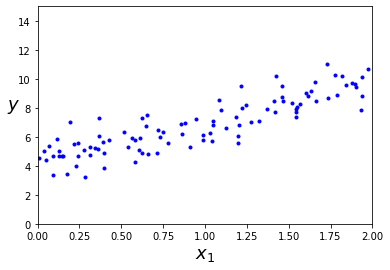

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\boldsymbol{w}^*$ using the **normal equation**. We will use the `inv()` function from `numpy`’s linear algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [ ]:
X_1 = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
w_star = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)

The function that we used to generate the data is $y = 4 + 3x_1 + \text{Gaussian noise}$. Let’s see what the normal equation found:

In [ ]:
w_star

array([[4.21509616],
       [2.77011339]])

We would have hoped for $w_0 = 4$ and $w_1 = 3$, instead of $w_0 = 4.21$ and $w_1 = 2.77$. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now we can make predictions using $\boldsymbol{w}^*$:

In [ ]:
X_new = np.array([[0], [2]])
X_new_1 = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_1.dot(w_star)
y_predict

array([[4.21509616],
       [9.75532293]])

Let’s plot this model’s predictions:

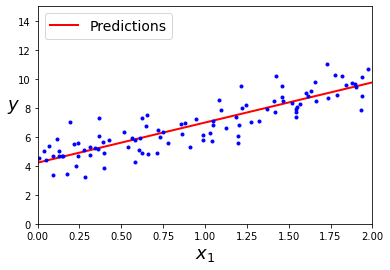

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Performing **linear regression** using `scikit-learn` is simple. We just use the `LinearRegression` class. In order to fit the dataset `X, y`, we use the `fit()` method. In order to retrieve the parameters $w_1,w_2,\ldots,w_d$ we use the `coef_` attribute. For the bias $w_0$, we use the `intercept_` attribute.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In order to use the model on new data, we use the `predict()` method:

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which we can call directly:

In [ ]:
w_star_svd, residuals, rank, s = np.linalg.lstsq(X_1, y, rcond=1e-6)
w_star_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\boldsymbol{X}^+\boldsymbol{y}$, where $\boldsymbol{X}^{+}$ is the _pseudoinverse_ of $\boldsymbol{X}$ (specifically the Moore-Penrose inverse). We can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [ ]:
np.linalg.pinv(X_1).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradient descent

First, let's implement the **batch gradient descent** algorithm. We will use a learning rate of 0.2 (`eta=0.2`), 1,000 epochs (`n_epochs = 1000`), and the size of the dataset is `n=100` examples.

In [ ]:
np.random.seed(42)
eta = 0.2  # learning rate
n_epochs = 1000
n = 100

w = np.random.randn(2,1)  # random initialization

for iteration in range(n_epochs):
    gradients = 1/n * X_1.T.dot(X_1.dot(w) - y)
    w = w - eta * gradients

Let’s look at the resulting `w`:

In [ ]:
w

array([[4.21509616],
       [2.77011339]])

That’s exactly what the normal equation found. Gradient descent worked perfectly. But what if we had used a different learning rate `eta`?

In [ ]:
np.random.seed(42)
eta = 0.02  # learning rate
n_epochs = 1000
n = 100

w = np.random.randn(2,1)  # random initialization

for iteration in range(n_epochs):
    gradients = 1/n * X_1.T.dot(X_1.dot(w) - y)
    w = w - eta * gradients

w

array([[4.1935218 ],
       [2.78916237]])

The learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time.

In [ ]:
np.random.seed(42)
eta = 1  # learning rate
n_epochs = 1000
n = 100

w = np.random.randn(2,1)  # random initialization

for iteration in range(n_epochs):
    gradients = 1/n * X_1.T.dot(X_1.dot(w) - y)
    w = w - eta * gradients

w

array([[-7.05138935e+27],
       [-7.98621001e+27]])

The learning rate is too high: the algorithm diverges, getting further and further away from the solution at every step.

In order to implement **stochastic gradient descent**, we can use the following code:

In [ ]:
np.random.seed(42)
eta = 0.2
n_epochs = 1000

w = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = X_1[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(w) - yi)
        w = w - eta * gradients

w

array([[4.17686315],
       [2.85986577]])

To perform linear regression using stochastic gradient descent with `scikit-learn`, we can use the `SGDRegressor` class, which defaults to optimizing the squared error loss function. The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (`max_iter=1000`, `tol=1e-3`). It starts with a learning rate of 0.1 (`eta0=0.2`), using the constant learning rate schedule (`learning_rate='constant'`). Lastly, it does not use any regularization (`penalty=None`):

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.2, learning_rate='constant', random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.99858866]), array([2.60693164]))

For implementing **mini-batch gradient descent**, we can use the following code:

In [ ]:
np.random.seed(42)
eta = 0.2
n_epochs = 1000
batch_size = 20

w = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(n)
    X_1_shuffled = X_1[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, n, batch_size):
        xi = X_1_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 1/batch_size * xi.T.dot(xi.dot(w) - yi)
        w = w - eta * gradients

w

array([[4.19811521],
       [2.75356112]])

#Polynomial regression

First, let’s generate some nonlinear data, based on a simple quadratic equation, plus some noise.

In [ ]:
np.random.seed(42)

n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

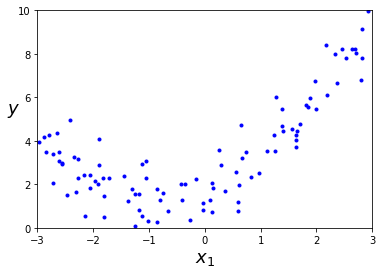

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Let’s use `scikit-learn`’s `PolynomialFeatures` class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature). The `fit_transform()` method fits the `PolynomialFeatures` transform to `X` and returns the transformed version of `X`.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` now contains the original feature of `X` plus the square of this feature. Now we can fit a `LinearRegression` model to this extended training data, thus obtaining **polynomial regression**.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

We can now can plot the predictions of the model. Here, we just use the `transform()` method, because the `PolynomialFeatures` transform is already fitted to the original `X`.

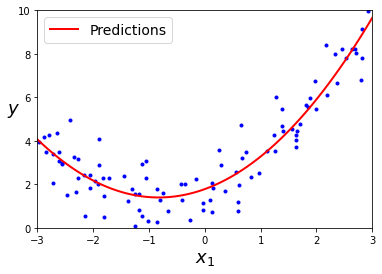

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Not bad: the model estimates $y = 0.56x_1^2 + 0.93x_1 + 1.78$, when in fact the original function was $y = 0.5x_1^2 + 1.0x_1 + 2.0 + \text{Gaussian noise}$.

Let's now apply a 100-degree polynomial model to the preceding training data and compare the result with a pure linear model and a quadratic model (second-degree polynomial). We can notice how the 100-degree polynomial model wiggles around to get as close as possible to the training instances.

This high-degree polynomial regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.

Here, we use the `Pipeline` class in order to sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement `fit()` and `transform()` methods. The final estimator only needs to implement `fit()`.

The `StandardScaler` class is used to standardize the features by removing the mean and scaling to unit variance. The operation is also called *normalization*.

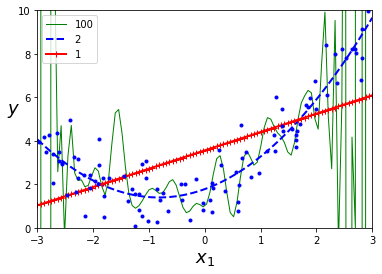

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 100), ("b--", 2, 2), ("r-+", 2, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_new = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_new, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#Regularized linear models

We next show several **ridge regression** models trained on some linear data using different values for the $\lambda$ hyperparameter (called `alpha` in `scikit-learn`). Note how increasing $\lambda$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance, but increasing its bias. The class for ridge regression in `scikit-learn` is simply `Ridge`.

In [ ]:
np.random.seed(42)
n = 20
X = 3 * np.random.rand(n, 1)
y = 1 + 0.5 * X + np.random.randn(n, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

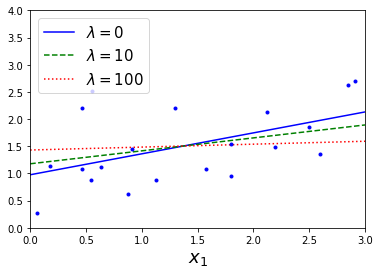

In [ ]:
from sklearn.linear_model import Ridge

for alpha, style in zip((0, 10, 100), ("b-", "g--", "r:")):
  ridge_reg = Ridge(alpha=alpha)
  ridge_reg.fit(X, y)
  y_new_reg = ridge_reg.predict(X_new)
  plt.plot(X_new, y_new_reg, style, label=r"$\lambda = {}$".format(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 3, 0, 4])
plt.show()

Here is how to perform ridge regression with `scikit-learn` using the closed-form solution, which uses the Cholesky decomposition:

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.intercept_, ridge_reg.coef_

(array([1.00650911]), array([[0.36280369]]))

Ridge regression can be also implemented using stochastic gradient descent:

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=1, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([0.88105339]), array([0.33523244]))

The `penalty` hyperparameter sets the type of regularization term to use. Specifying `"l2"` indicates that we want stochastic gradient descent to add a regularization term to the cost function equal to half the square of the $\ell_2$ norm of the weight vector, which is equivalent with ridge regression.

We can use **lasso regression** models trained on some linear data using different values for the $\lambda$ hyperparameter (also called `alpha` in `scikit-learn`). Note that we use smaller values for $\lambda$. The class for lasso regression in `scikit-learn` is simply `Lasso`.

In [ ]:
np.random.seed(42)
n = 20
X = 3 * np.random.rand(n, 1)
y = 1 + 0.5 * X + np.random.randn(n, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

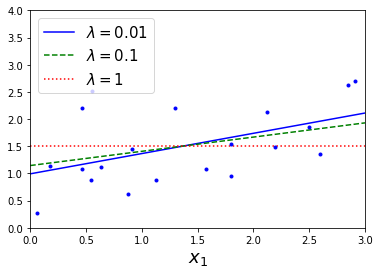

In [ ]:
from sklearn.linear_model import Lasso

for alpha, style in zip((0.01, 0.1, 1), ("b-", "g--", "r:")):
  lasso_reg = Lasso(alpha=alpha)
  lasso_reg.fit(X, y)
  y_new_reg = lasso_reg.predict(X_new)
  plt.plot(X_new, y_new_reg, style, label=r"$\lambda = {}$".format(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 3, 0, 4])
plt.show()

We can also use `SGDRegressor` with `penalty="l1"` to implement lasso regression:

In [ ]:
sgd_reg = SGDRegressor(penalty="l1", alpha=1, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([1.017502]), array([0.07016255]))

Standing up to its name, lasso regression has learned to almost discard the feature in the data, by assigning its weight a value close to 0.

Finally, we can perform **elastic net regression**. The hyperparameter $r$ which specifies the ratio for $\ell_1$ regularization (correspondingly, $1-r$ will be the ratio for $\ell_2$ regularization) is given by the `l1_ratio` parameter.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.intercept_, elastic_net.coef_

(array([1.50467735]), array([0.]))

Or, in its stochastic gradient descent variant:

In [ ]:
sgd_reg = SGDRegressor(penalty="elasticnet", alpha=1, l1_ratio=0.5, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([0.98691798]), array([0.20034481]))

Now, let's look at how to implement the **early stopping** regularization method.

First, we generate some quadratic data. Then, we construct the training and validation sets, by using the `train_test_split()` method, which splits arrays or matrices into random train and test subsets. The `test_size` paramater represents the proportion of the dataset to include in the test split ($50\%$ in our case).

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(n, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Then, we use polynomial regression to fit the data, with degree 90. Then, we use `SGDRegressor` to apply stochastic gradient descent to the problem. Instead of letting the class perform all the iterations at once, with no control, we specify `max_iter=1` to just train for one epoch at a time. Note that with `warm_start=True`, when the `fit()` method is called, it continues training where it left off, instead of restarting from scratch.

We use the `mean_squared_error(y_true, y_pred)` method to compute the mean squared error regression loss between the targets `y_true` and the predictions of our model `y_pred`. The training errors and the validation errors are saved for plotting.

The best epoch and the best model are saved. The `clone(estimator)` method is used to construct a new estimator with the same parameters as `estimator`.

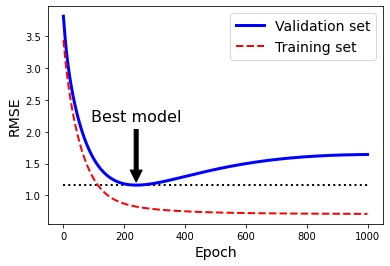

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
n_epochs = 1000
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_error = mean_squared_error(y_val, y_val_predict)
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_val_rmse = np.sqrt(minimum_val_error)

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [ ]:
best_epoch, best_model, best_val_rmse

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True),
 1.1624590535779686)

We can see that the best validation RMSE was 1.162, attained at epoch 239. After that, the model began to overfit, and the validation RMSE increased.

#Logistic regression

Let’s use the `iris` dataset to illustrate classification algorithms. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: iris setosa, iris versicolor, and iris virginica.

It is included in `scikit-learn` in the `datasets` module. We
can load it by calling the `load_iris` function:

In [ ]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

The `iris` object that is returned by `load_iris` is a `Bunch` object, which is very similar to a dictionary. It contains keys and values:

In [ ]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can find out more about the dataset in the `DESCR` attribute.

In [ ]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The value of the key `target_names` is an array of strings, containing the species of flower that we want to predict:

In [ ]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The value of `feature_names` is a list of strings, giving the description of each feature:

In [ ]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data itself is contained in the `target` and `data` fields. `data` contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a `numpy` array:

In [ ]:
type(iris_dataset['data'])

numpy.ndarray

The rows in the data array correspond to the flowers, while the columns represent the four measurements that were taken for each flower:

In [ ]:
iris_dataset['data'].shape

(150, 4)

We see that the array contains measurements for 150 different flowers. The individual items are called *examples* in machine learning, and their properties
are called *features*. The shape of the data array is the number of examples multiplied by the number of features. This is a convention in `scikit-learn`, and our data will always be assumed to be in this shape. Here are the feature values for the first five examples:

In [ ]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

From this data, we can see that all of the first five flowers have a petal width of 0.2 cm and that the first flower has the longest sepal, at 5.1 cm.

The `target` array contains the species of each of the flowers that were measured, also as a `numpy` array:

In [ ]:
type(iris_dataset['target'])

numpy.ndarray

`target` is a one-dimensional array, with one entry per flower:

In [ ]:
iris_dataset['target'].shape

(150,)

The species are encoded as integers from 0 to 2:

In [ ]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The meanings of the numbers are given by the `iris['target_names']` array:
0 means setosa, 1 means versicolor, and 2 means virginica.

We will again use the `train_test_split()` with the default parameters. It will extract 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is will be the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

Before making the split, the `train_test_split()` method shuffles the dataset using a pseudorandom number generator. If we just took the last 25% of the data as a test set, all the data points would have the label 2, as the data points are sorted by the label (see the output for `iris['target']` shown earlier). Using a test set containing only one of the three classes would not tell us much about how well our model generalizes, so we shuffle our data to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the `random_state` parameter. This will make the outcome deterministic, so this line will always have the same outcome.

The output of the `train_test_split()` method is `X_train`, `X_test`, `y_train`, and `y_test`, which are all `numpy` arrays. `X_train` contains 75% of the rows of the dataset, and `X_test` contains the remaining 25%:

In [ ]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
X_test.shape, y_test.shape

((38, 4), (38,))

Let’s now use **logistic regression** to build a binary classifier to detect the iris virginica type. Basically, we will have two classes: iris virginica and not iris virginica. We transform the targets correspondingly:

In [ ]:
y_train_binary = (y_train == 2).astype(int) # 1 if iris virginica, else 0
y_test_binary = (y_test == 2).astype(int) # 1 if iris virginica, else 0

Now let’s train a `LogisticRegression` model:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_binary)

LogisticRegression(random_state=42)

In order to evaluate the accuracy of the logistic regression model on the test set, we use the `score()` method:

In [ ]:
log_reg.score(X_test, y_test_binary)

0.9736842105263158

A test set accuracy of 97.3% was obtained, which means that our model correctly classified 97.3% of the examples in the test set.

We can use the `predict()` method to apply the trained model on the first example in the test set:

In [ ]:
log_reg.predict([X_test[0]])

array([1])

The model predicted that the first example in the test set is an iris virginica.

We can also inspect the probabilities the model assigned to the negative and positive classes, respectively, using the `predict_proba()` method:

In [ ]:
log_reg.predict_proba([X_test[0]])

array([[0.08458525, 0.91541475]])

The model is 91.5% sure that the example is an iris virginica.

#Softmax regression

Let’s use **softmax regression** to classify the iris flowers into the three classes. `scikit-learn`’s `LogisticRegression` class uses one-versus-the-rest by default when we train it on more than two classes, but we can set the `multi_class` hyperparameter to `"multinomial"` to switch it to softmax regression. We must also specify a solver that supports softmax regression, such as the `"lbfgs"` solver, which is basically a variant of stochastic gradient descent. It also applies $\ell_2$ regularization by default, which you can control using the hyperparameter `C`, which is the inverse of regularization strength (i.e., $C=1/\lambda$), meaning that smaller values specify stronger regularization.

In [ ]:
softmax_reg = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)
softmax_reg.score(X_test, y_test)

0.9736842105263158

A test set accuracy of 97.3% was obtained, which means that our model correctly classified 97.3% of the examples in the test set.

Again, we can use the `predict()` method to apply the trained model on the first example in the test set:

In [ ]:
softmax_reg.predict([X_test[0]])

array([2])

In this case, the classes are the original ones: 0 means setosa, 1 means versicolor, and 2 means virginica. Thus, the model thinks that the first example in the test set is an iris virginica.

We can again inspect the probabilities the model assigned to the three classes, using the `predict_proba()` method:

In [ ]:
softmax_reg.predict_proba([X_test[0]])

array([[8.71083042e-08, 2.39654879e-03, 9.97603364e-01]])

This model is 99.7% certain that the first example in the test set is an iris virginica. The first two probabilities correspond to the setosa and versicolor classes, respectively. We can verify that the three probabilities add up to 1, meaning that the model outputs a probability distribution over the three classes:

In [ ]:
np.sum(softmax_reg.predict_proba([X_test[0]]))

1.0